In [4]:
import igraph as ig
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
n = 1000
k = 10
p_list = 10 ** np.linspace(-4,0,14)
iterations = 20
rg = ig.Graph.Watts_Strogatz(1,n,k,0.0)
r_avg_shortest = np.mean(rg.shortest_paths())
r_clustering_coefficient = rg.transitivity_avglocal_undirected()

Ls = []
Cs = []
for p in p_list:
    a_s = []
    c_e = []
    for i in range (0,iterations):
        g = ig.Graph.Watts_Strogatz(1,n,k,p)
        avg_shortest = np.mean(g.shortest_paths())
        clustering_coefficient = g.transitivity_avglocal_undirected()
        a_s.append(avg_shortest)
        c_e.append(clustering_coefficient)
    Ls.append(np.median(a_s)/r_avg_shortest)
    Cs.append(np.median(c_e)/r_clustering_coefficient)

    $L(p)/L(0)$  $C(p)/C(0)$         p
0      0.743512     0.999467  0.000100
1      0.581151     0.998827  0.000203
2      0.473797     0.997810  0.000412
3      0.342856     0.995378  0.000838
4      0.260895     0.990245  0.001701
5      0.214943     0.980843  0.003455
6      0.179564     0.959572  0.007017
7      0.155829     0.919246  0.014251
8      0.137260     0.841953  0.028943
9      0.124052     0.705241  0.058780
10     0.113285     0.475192  0.119378
11     0.106861     0.205512  0.242446
12     0.103899     0.043150  0.492388
13     0.103595     0.028062  1.000000


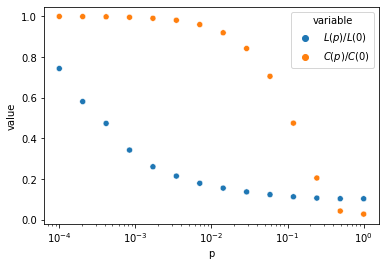

In [12]:
df = pd.DataFrame(data = {"$L(p)/L(0)$": Ls, "$C(p)/C(0)$": Cs, "p": p_list})
print(df)
df = df.melt(id_vars = ['p'],value_vars = ['$L(p)/L(0)$',"$C(p)/C(0)$"])
sns.scatterplot(data = df,x = "p", y = "value", hue = "variable")
plt.xscale('log')
plt.show()